In [1]:
# IPython Imports
# Used to make notebook wider, comment out for normal notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import clear_output

In [24]:
%matplotlib inline
# Import Libraries
import boto3
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplcyberpunk
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

plt.style.use("cyberpunk")
# plt.style.use('dark_background')
# plt.style.use('ggplot')


In [3]:
# GLOBAL VARS
BKT_NAME = 'ds-data-2020'
# DATASET NAMES
the_cc = "auto_data_clean.csv" # Main CLEANED Dataset
# SET DATA PATH/KEYS
KEY = the_cc

In [4]:
# Create boto3 s3 Client Object
s3 = boto3.client('s3')
# Create s3 Bucket Object -> Dict
obj = s3.get_object(Bucket=BKT_NAME, Key=KEY)

In [5]:
# Convert Bucket File to pd.DataFrame
auto_df = pd.read_csv(obj['Body'], low_memory=False)

# IMPORTANT DATASET CHANGE
> Dropped 2009 Chevrolet Tahoe due to incorrect Torque values (over 3000 lbf)

In [6]:
auto_df = auto_df[auto_df["Torque"] < 1000]

In [7]:
# PLOTTER FUNCTIONS
def build_scatter(ax_obj:object, x_series:pd.Series, y_series:pd.Series, x_range:tuple, ax_pos=None, fig_obj:object=None, colors:list=None, alpha_col:float=0.7, col_div:bool=False, col_bar:bool=False) -> None:
    """Create scatter plot with color divides by bounds"""
    # Set Default Colors
    colors = colors if colors is not None else ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]
    # Create Bounds From x_series
    bounds = np.arange(*x_range)
    # Create Color Divides by Bound Range
    cmap = matplotlib.colors.ListedColormap(colors) if col_div else None
    norm = matplotlib.colors.BoundaryNorm(bounds, len(colors)) if col_div else None

    # Assign Scatter to ax_obj
    ax_obj.scatter(x_series, y_series, c=x_series, cmap=cmap, norm=norm, alpha=alpha_col)

    # Decoration
    ax_obj.set_title(f'\n{y_series.name} by {x_series.name}\n', fontsize=22)
    ax_obj.set_xlabel(f"{x_series.name}\n", fontsize=18)
    ax_obj.set_ylabel(f"{y_series.name}\n", fontsize=18)
    
    # Add Color Bar
#     if col_bar and (fig_obj is not None and ax_pos is not None):
#         fig_obj.colorbar(bounds, ax=ax_pos, cax=ax_obj, pad=0.2)
    
    # Set Lims
    ax_obj.set_xlim(x_series.min(), x_series.max())


<h1 align="center">
  <br>
      Automotive EDA (5-Cylinder Engines)
  <br>
</h1>
<img src="https://raw.githubusercontent.com/boogiedev/automotive-eda/master/img/automobiles.jpg" width="800">

## Objective
> Explore the differences between 5 Cylinder Engines and "Traditional" I-4/V-6 Engine Types 




# Efficiency:
> ### MPG Distribution by Cylinders  

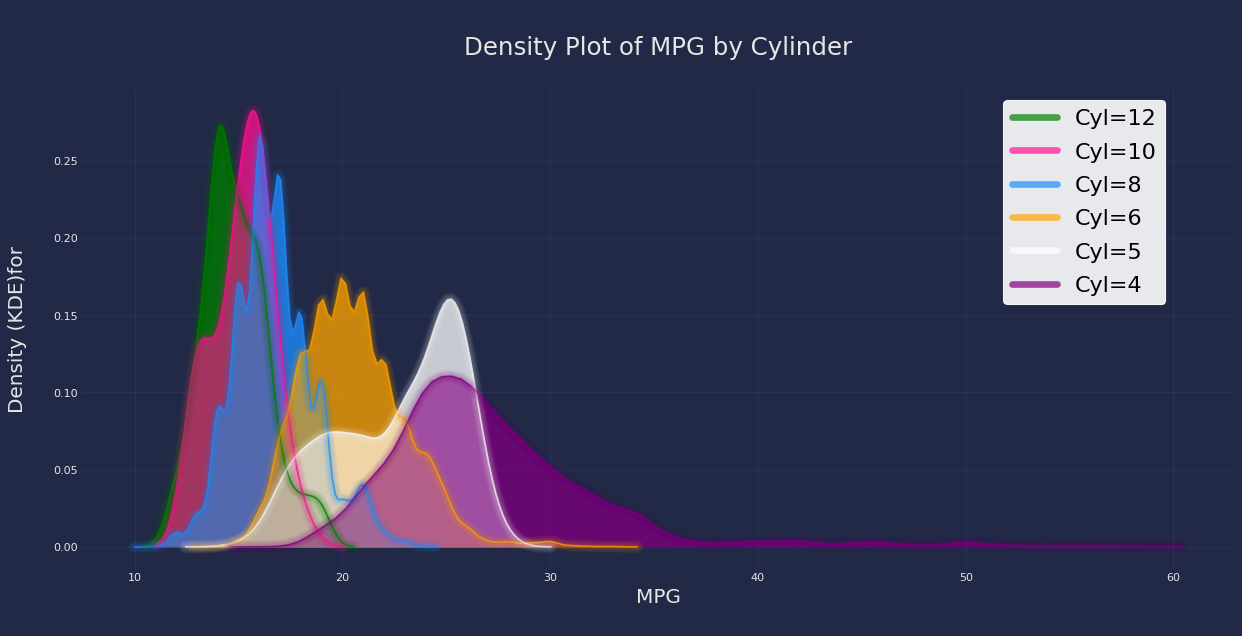

In [8]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
cyls = (sorted(auto_df["Cylinders"].unique())[1:-1][::-1])

# Plot Points
for col, cyl in zip(colors, cyls):
    cyl = int(cyl)
    sns.kdeplot(auto_df.loc[auto_df['Cylinders'] == cyl, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Cyl={cyl}", alpha=.7)

# Decoration
plt.title('\nDensity Plot of MPG by Cylinder\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density (KDE)for\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(0.45, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show PlotDistribution
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

In [9]:
# Create Dataframe Consisting of only 5 Cylinder Vehicles
five_cyl_df = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5]
five_cyl_df.reset_index(inplace=True)

In [10]:
# Create Groupby Object by 'Brand'
group_5_cyl = auto_df[auto_df["Cylinders"] == 5].groupby("Brand")

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution 

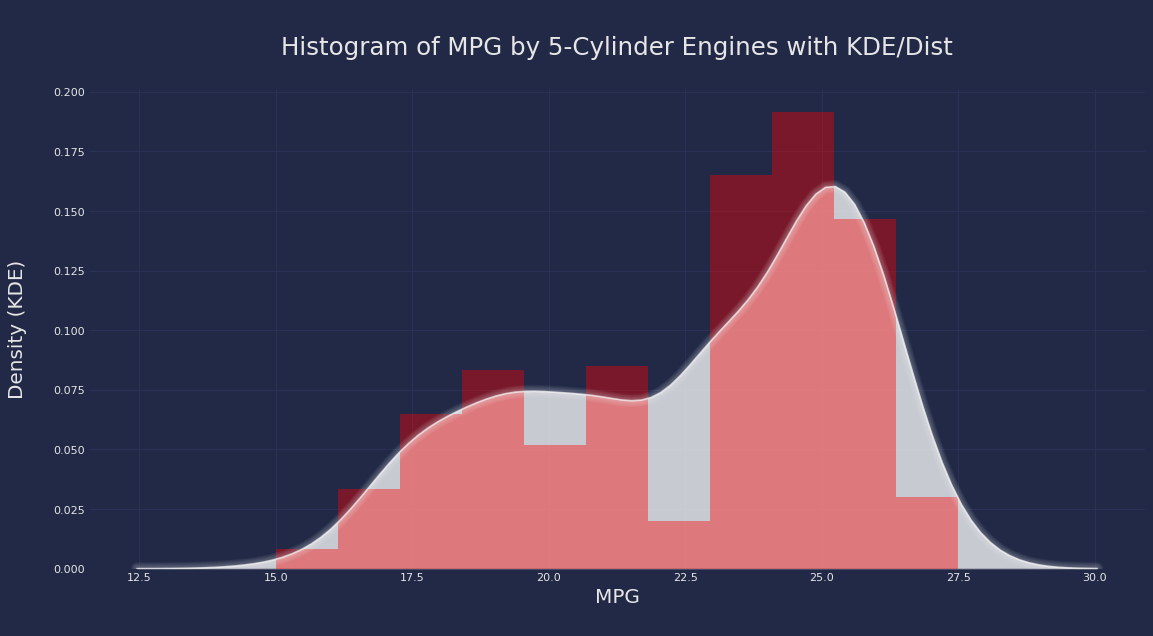

In [11]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

# Plot Points
mpg_kde_plot = sns.distplot(auto_df.loc[auto_df['Cylinders'] == 5, "Gas Mileage (Combined)"],
             color="red",
             kde_kws={
                 "color":'white',
                 "shade":True,
                 "alpha":0.7,
             }
            )

# Decoration
plt.title('\nHistogram of MPG by 5-Cylinder Engines with KDE/Dist\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density (KDE)\n", fontsize=18)
mplcyberpunk.add_underglow()
mplcyberpunk.add_glow_effects()

# Show Plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=1, hspace=0)
plt.show()

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Manufacturer (Full) 

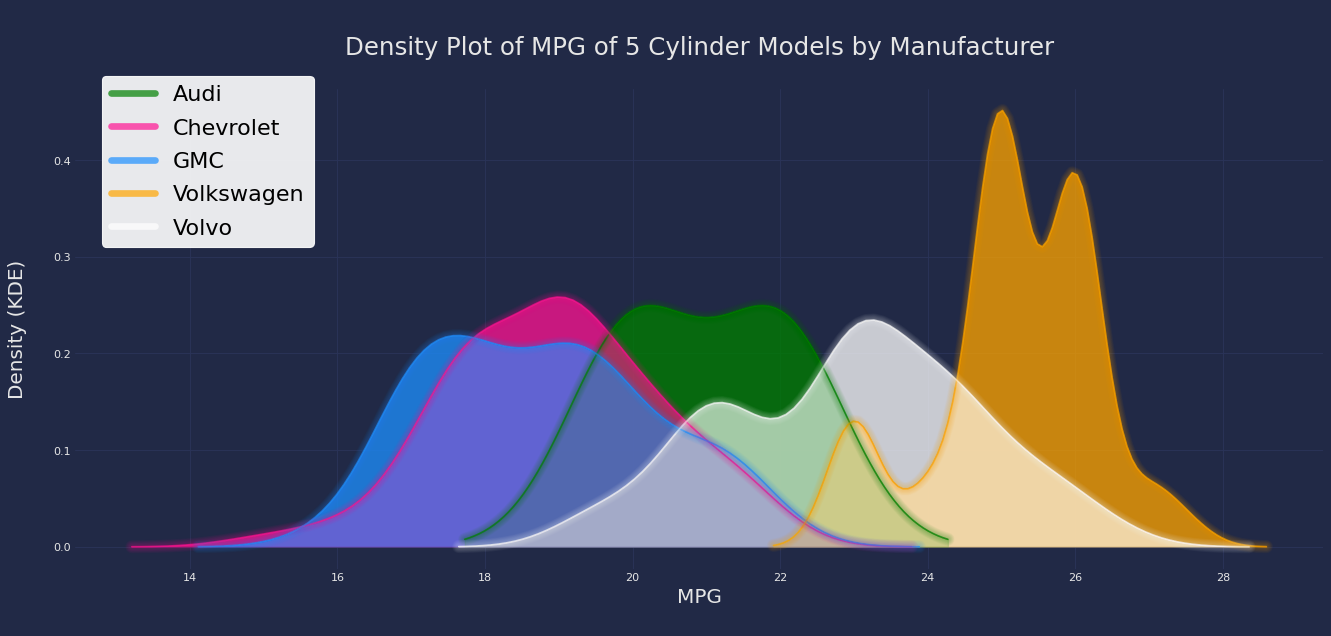

In [12]:
# # plt.style.use('dark_background')
# # plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]

# Plot Points
for col, bdf in zip(colors, group_5_cyl):
    brand = bdf[0]
    sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], shade=True, color=col, label=f"{brand}", alpha=.7)

# Decoration
plt.title('\nDensity Plot of MPG of 5 Cylinder Models by Manufacturer\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density (KDE)\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(-0.30, 0.55, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show Plot
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=1, hspace=0)
plt.show()

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Manufacturer (Granulated) 

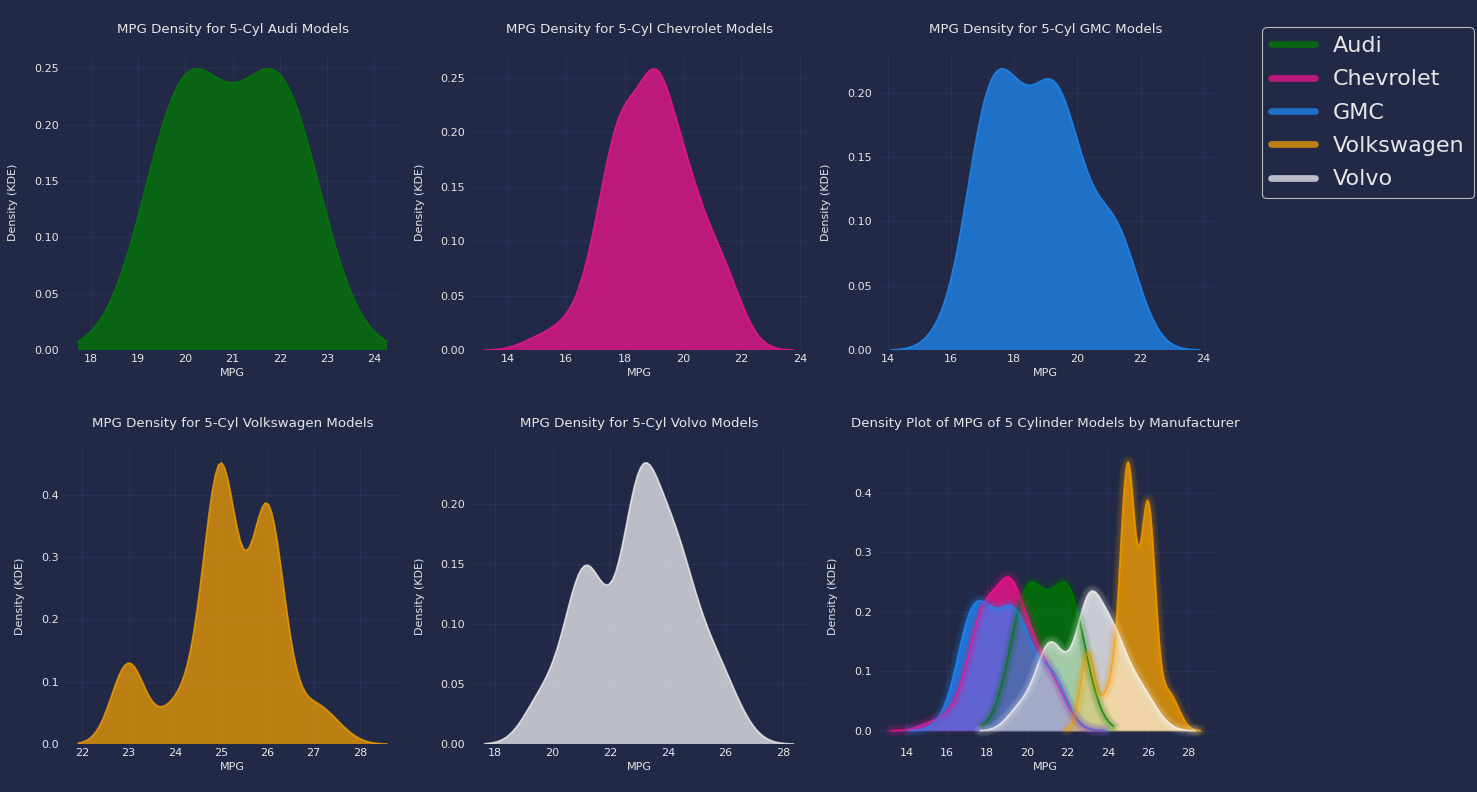

In [13]:
# # plt.style.use('dark_background')
# # plt.style.use('ggplot')

# Draw Plot
fig, axs = plt.subplots(2, 3, figsize=(16,10), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
axes = axs.flatten()
# Plot Points
for col, bdf, ax in zip(colors, group_5_cyl, axes[:-1]):
    brand = bdf[0]
    # Plot
    sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], ax=ax, shade=True, color=col, label=f"{brand}", alpha=.7, legend=False)
    # Decoration
    ax.set_title(f'\nMPG Density for 5-Cyl {brand} Models\n', fontsize=12)
    ax.set_xlabel("MPG\n", fontsize=10)
    ax.set_ylabel("Density (KDE)\n", fontsize=10)
    
# Plot on Final Graph
for col, bdf in zip(colors, group_5_cyl):
    brand = bdf[0]
    final = sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], ax=axes[-1], shade=True, color=col, label=f"{brand}", alpha=.7, legend=False)
    # Decoration
    axes[-1].set_title(f'\nDensity Plot of MPG of 5 Cylinder Models by Manufacturer\n', fontsize=12)
    axes[-1].set_xlabel("MPG\n", fontsize=10)
    axes[-1].set_ylabel("Density (KDE)\n", fontsize=10)
# Fix Final Graph Size

# Get Legend Handles
handles, labels = final.get_legend_handles_labels()
# Set Legend Attr
legend_ = fig.legend(handles[:], labels[:], loc="upper right", bbox_to_anchor=(0.66, 0.47, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Show Plot
fig.tight_layout()
plt.show()

In [14]:
# Find all models with 5 cyl engines and group
models_5_cyl = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5].groupby("Model")

# Set Horspower Index as Standard
model_hp_group = five_cyl_df[['Horsepower', 'Model']].groupby('Model').apply(lambda x: x.mean())
model_hp_group.sort_values('Horsepower', inplace=True)
model_hp_group.reset_index(inplace=True)

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Model 

In [41]:
# Setup Data

# Identiy the columns to aggregate by
group_cols = ['Model', "Brand"]
# Identify the columns to average
metric_cols = ['Gas Mileage (Combined)']
# Copy df
five_cyl_cop = five_cyl_df.copy()

# Create new DataFrame w/MultiIndex consisting of the group_cols and col for the mean of each metric_cols item
aggs = five_cyl_cop.groupby(group_cols)[metric_cols].mean()
# Remove metric_cols from df to replace with means in aggs
five_cyl_cop.drop(metric_cols, axis=1, inplace=True)
# Dupe to leave one row with each combination of group_cols in df
five_cyl_cop.drop_duplicates(subset=group_cols, keep='last', inplace=True)
# Mean columns from aggs into df
five_cyl_cop = five_cyl_cop.merge(right=aggs, right_index=True, left_on=group_cols, how='right')
# Reset Index
five_cyl_cop.reset_index(inplace=True)

# Get Average MPG Per Cylinder as Comparison Metric
all_cyl_mpg = auto_df[['Gas Mileage (Combined)', 'Cylinders']].groupby('Cylinders').apply(lambda x: x.mean())
all_cyl_mpg.sort_values('Gas Mileage (Combined)', inplace=True)

all_cyl_mpg = all_cyl_mpg.loc[[4, 6, 8, 12]]

# Add Extra X Tick Data for Other Averages
xtra_xticks = ([f"{x}-CYL AVG" for x in all_cyl_mpg.index])

# five_cyl_cop.sort_values("Gas Mileage (Combined)")

# five_cyl_cop.head()

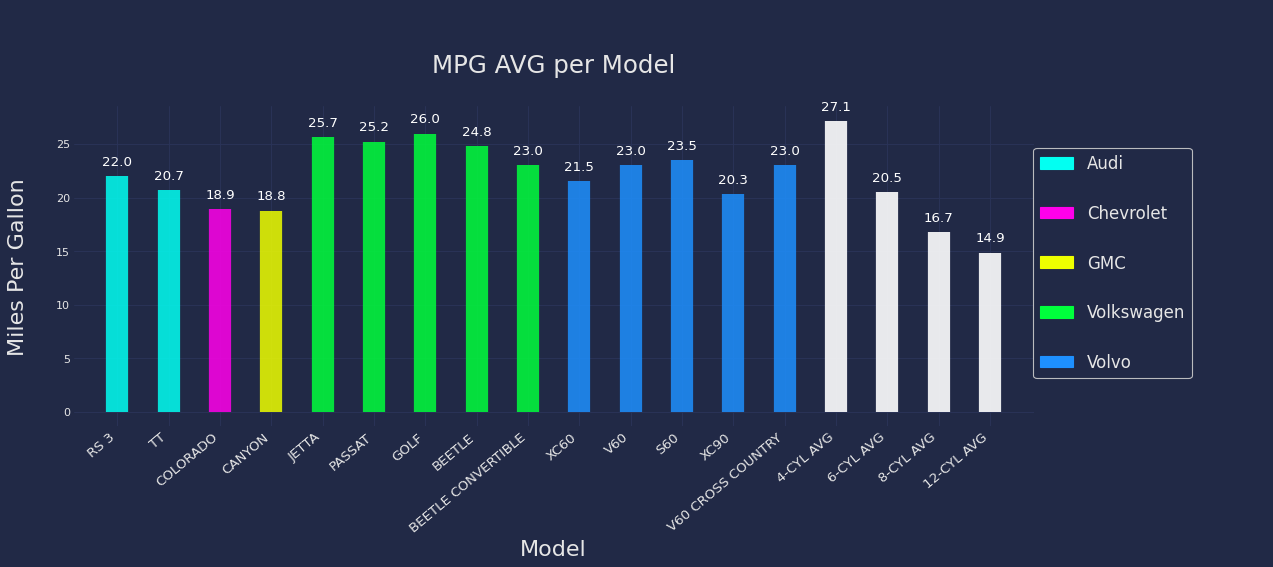

In [71]:
# Draw plot
fig, ax = plt.subplots(figsize=(12,4), dpi= 80)

# Map Colors to Brand
color_dict = dict(zip(['Audi', 'Chevrolet', 'GMC', 'Volkswagen', 'Volvo'], ['#02fff2', '#ff00ea', '#eeff00', '#00ff3c', "dodgerblue"]))
curated_colors = []
for brand in five_cyl_cop["Brand"]: 
    curated_colors.append(color_dict[brand])
# Colors for xtra columns
xtra_colors = ["deeppink", "orange", "white", "magenta"]
# Create Gradient
gradient = ["#f13600", "#e36500",  "#d58e00",  "#c7b000", "#a4b800", "#72aa00", "#459c00", "#208e00", "#70ff50", "#00ff41"]


# Create Vertical Lines
ax.vlines(x=five_cyl_cop.index, ymin=0, ymax=five_cyl_cop["Gas Mileage (Combined)"], color=curated_colors, alpha=0.85, linewidth=20)
ax.vlines(x=[five_cyl_cop.index[-1] + x for x in range(1, len(xtra_xticks) + 1)], ymin=0, ymax=all_cyl_mpg["Gas Mileage (Combined)"], color="white", alpha=0.9, linewidth=20)

# Annotate Text
for i, mpg in enumerate(five_cyl_cop["Gas Mileage (Combined)"]):
    ax.text(i, mpg+1, round(mpg, 1), horizontalalignment='center', fontsize=12, color="white")
    
for j, mpg in enumerate(all_cyl_mpg["Gas Mileage (Combined)"], start=(i + 1)):
    ax.text(j, mpg+1, round(mpg, 1), horizontalalignment='center', fontsize=12, color="white")
    
# Set X Ticks As Models
tick_idx = list(five_cyl_cop.index) + [five_cyl_cop.index[-1] + x for x in range(1, len(xtra_xticks) + 1)]
ticks =  [x for x in five_cyl_cop["Model"].str.upper()] + xtra_xticks
plt.xticks(tick_idx, ticks, rotation=40, horizontalalignment='right', fontsize=12)

# Decoration
title = plt.title('\nMPG AVG per Model\n', fontsize=22)
x_lab = plt.xlabel("Model", fontsize=20)
y_lab = plt.ylabel("Miles Per Gallon\n", fontsize=20)

# Legend Vars
leg_set = ['Audi', 'Chevrolet', 'GMC', 'Volkswagen', 'Volvo']
leg_col = ['#02fff2', '#ff00ea', '#eeff00', '#00ff3c', 'dodgerblue']
# Create Custom Patches for brands
brand_patch = [patches.Patch(color=y, label=x) for x, y in zip(leg_set, leg_col)]
# Set Legend Attr
legend_ = fig.legend(handles=brand_patch, loc="center right", bbox_to_anchor=(0.75, 0.7, 0.5, 0.5), fontsize=15, labelspacing=1.9, frameon=True, framealpha=0.9)

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)
    
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Show Plot
fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=0)
plt.show()



# Performance:
> ### Horsepower/Torque of 5-Cylinder Engines by Model

In [19]:
# Setup Data
model_tq_group = five_cyl_df[['Torque', 'Model']].groupby('Model').apply(lambda x: x.mean())
model_tq_group.sort_values('Torque', inplace=True)
model_tq_group.reset_index(inplace=True)

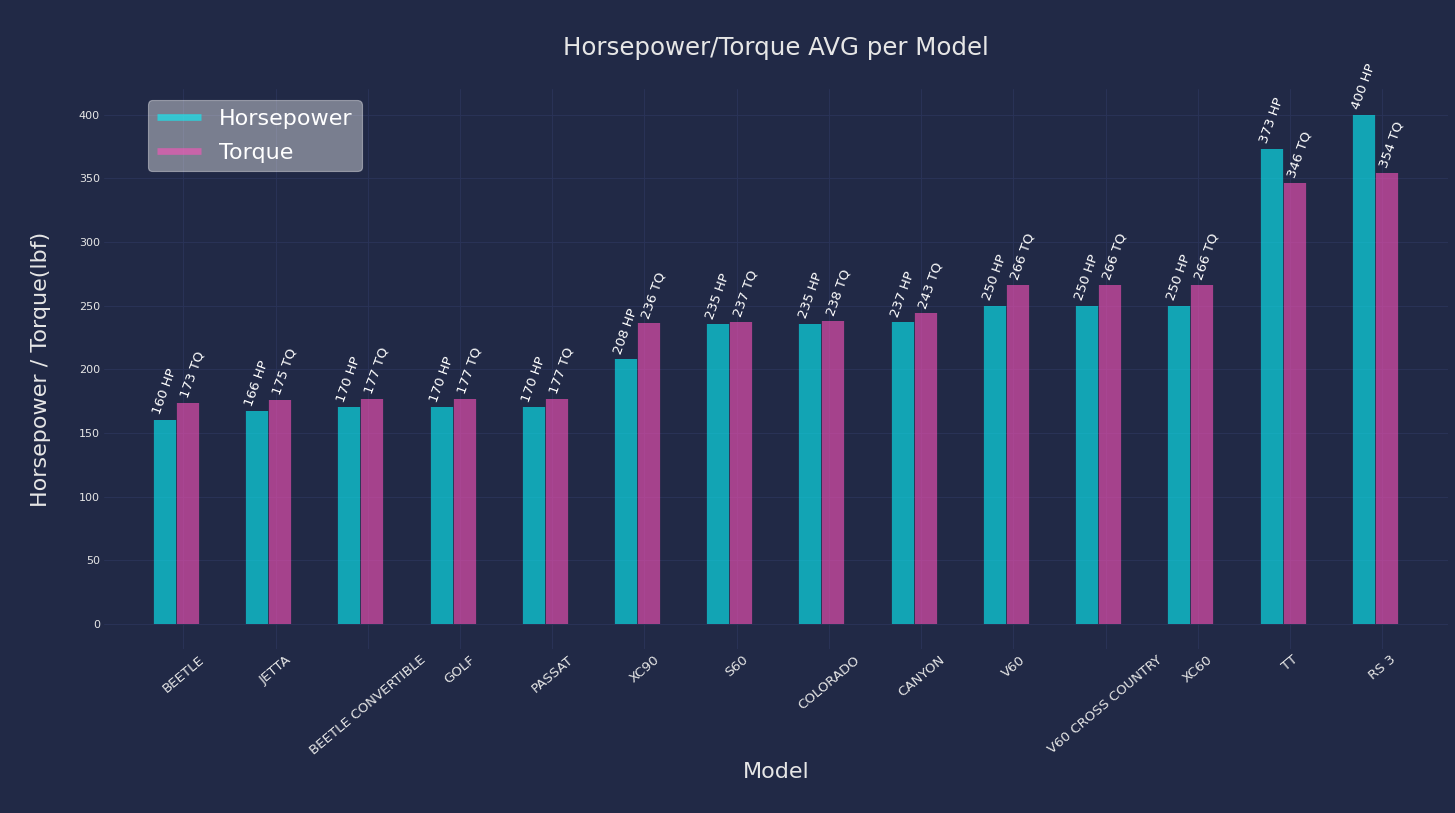

In [20]:
# df = five_cyl_df[["Horsepower", "Torque"]]

# Set Colors
col_1 = '#08F7FE' # teal/cyan
col_2 = '#FE53BB' # pink
colors = [col_1, col_2]
alpha_col = 0.7

# Draw plot
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)

# HP
ax.vlines(x=model_hp_group.index, ymin=0, ymax=model_hp_group["Horsepower"], color=col_1, alpha=0.6, linewidth=20)
# Annotate Text
for i, hp in enumerate(model_hp_group["Horsepower"]):
    ax.text(i, hp+5, f"{int(hp)} HP", horizontalalignment='center', fontsize=12, color="white", rotation=70)
# TQ
ax.vlines(x=[x+0.25 for x in model_tq_group.index], ymin=0, ymax=model_tq_group["Torque"], color=col_2, alpha=0.6, linewidth=20)
# Annotate Text
for i, tq in enumerate(model_tq_group["Torque"]):
    ax.text(i+0.3, tq+5, f"{int(tq)} TQ", horizontalalignment='center', fontsize=12, color="white", rotation=70)
    
# Decoration
title = plt.title('\nHorsepower/Torque AVG per Model\n', fontsize=22)
x_lab = plt.xlabel("Model\n", fontsize=20)
y_lab = plt.ylabel("\nHorsepower / Torque(lbf)\n", fontsize=20)


# Set Legend Attr
legend_ = plt.legend(["Horsepower", "Torque"], loc="upper right", bbox_to_anchor=(-0.30, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.4)
for text in legend_.get_texts():
    text.set_color("white")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)
    
# Set X Ticks As Models
plt.xticks([x+0.2 for x in model_hp_group.index], model_hp_group["Model"].str.upper(), rotation=40, horizontalalignment='center', fontsize=12)

# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Show Plot
fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

# Performance:
> ### Horsepower/Torque Distribution Engines by Cylinder

In [21]:
# Setup Data
cyl_power_group = auto_df[['Cylinders', 'Horsepower', 'Torque']].groupby('Cylinders')
cyl_pow_means = cyl_power_group.apply(lambda x: x.mean())
# cyl_power_group.sort_values('Horsepower', inplace=True)
# Set index back to numbers
cyl_pow_means.index = range(0, len(cyl_power_group))

# cyl_power_group
# cyl_pow_means

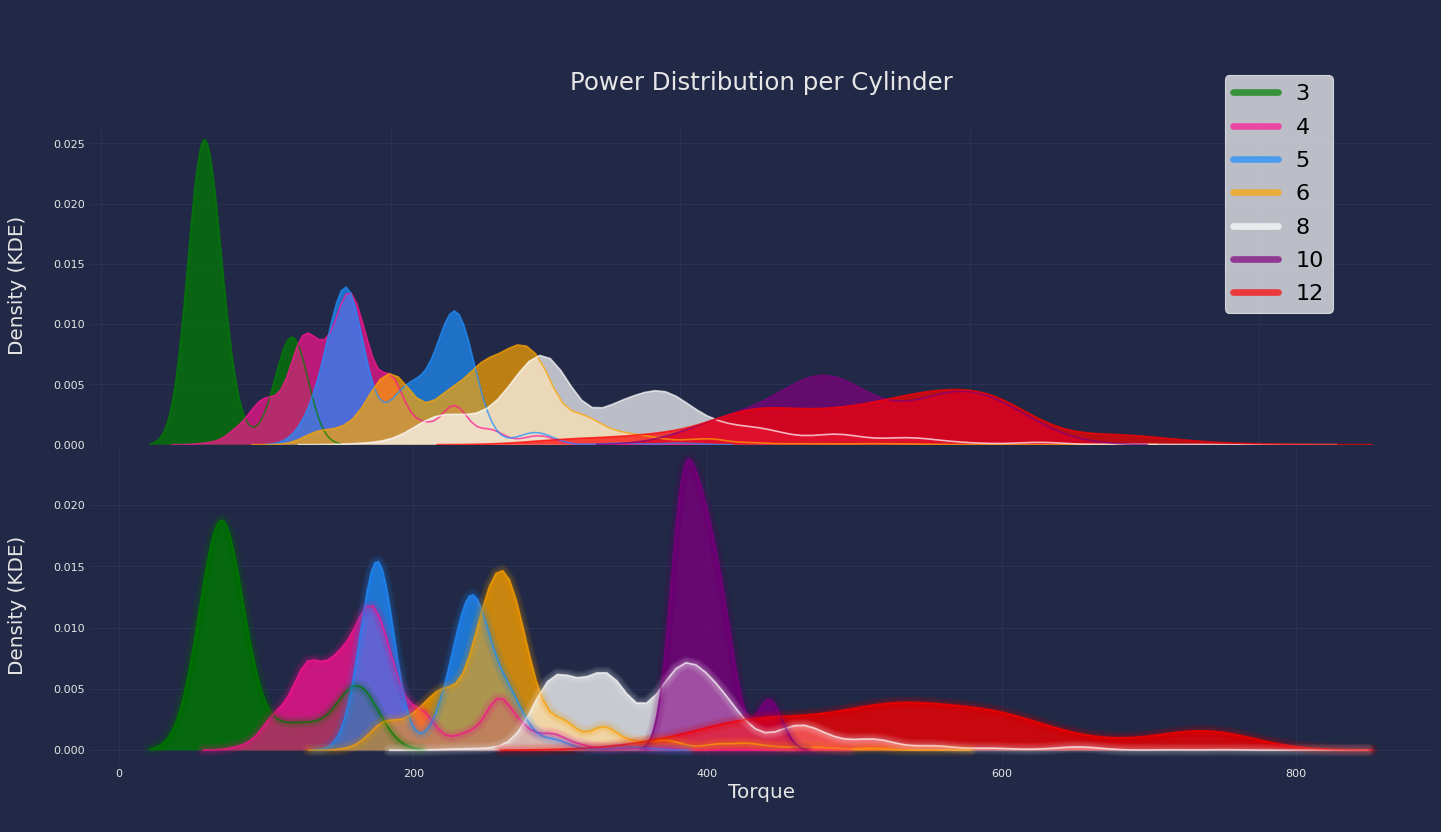

In [22]:
# Draw Plot
fig, axs = plt.subplots(2, 1, figsize=(14,8), dpi= 80)
axes = axs.flatten()
alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]

# Plot Points
for col, hdf in zip(colors, cyl_power_group):
    cyl = hdf[0]
    sns.kdeplot(hdf[1]["Horsepower"], ax=axes[0], shade=True, color=col, label=f"{int(cyl)}", alpha=.7, legend=False)
    axes[0].set_xlabel("Horsepower\n", fontsize=18)
    axes[0].set_ylabel("Density (KDE)\n", fontsize=18)

    
for col, tdf in zip(colors, cyl_power_group):
    cyl = tdf[0]
    sns.kdeplot(tdf[1]["Torque"], ax=axes[1], shade=True, color=col, label=f"{int(cyl)}", alpha=.7, legend=False)
    axes[1].set_xlabel("Torque\n", fontsize=18)
    axes[1].set_ylabel("Density (KDE)\n", fontsize=18)
    
# Decoration
axes[0].set_title('\nPower Distribution per Cylinder\n', fontsize=22)

# Set Legend Attr
legend_ = fig.legend([int(x) for x in cyl_pow_means["Cylinders"]], loc="upper right", bbox_to_anchor=(0.7, 0.7, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.7)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)
    
    
# Show Plot
fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

In [23]:
auto_df[auto_df["Cylinders"] == 10]

,Year,Brand,Model,Style Name,Drivetrain,Horsepower,Torque,Engine Type,Cylinders,Displacement(L),...,Passenger Capacity,Passenger Doors,Wheelbase (in),Min Ground Clearance (in),"Track Width, Front (in)","Track Width, Rear (in)","Height, Overall (in)",@ RPM (HP),@ RPM (TQ),Rear Tire Size
1086,2011,Audi,S6,4dr Sdn Prestige,All-Wheel Drive,435.0,398.0,Gas V10,10.0,5.2,...,5,4,112.1,4.3,62.8,62.0,57.0,6800,3000-4000,P265/35R19
1087,2010,Audi,S6,4dr Sdn Prestige,All-Wheel Drive,435.0,398.0,Gas V10,10.0,5.2,...,5,4,112.1,4.3,62.8,62.0,57.0,6800,3000-4000,P265/35R19
1088,2009,Audi,S6,4dr Sdn Prestige,All-Wheel Drive,435.0,398.0,Gas V10,10.0,5.2,...,5,4,112.1,4.3,62.8,62.0,57.0,6800,3000-4000,P265/35R19
1089,2008,Audi,S6,4dr Sdn,All-Wheel Drive,435.0,398.0,Gas V10,10.0,5.2,...,5,4,112.1,4.3,62.8,62.0,57.0,6800,3000-4000,P265/35R19
1090,2007,Audi,S6,4dr Sdn,All-Wheel Drive,435.0,398.0,Gas V10,10.0,5.2,...,5,4,112.1,4.3,62.8,62.0,57.0,6800,3000-4000,P265/35R19
2167,2008,BMW,5-Series,M5 Sedan,Rear Wheel Drive,500.0,383.0,Gas V10,10.0,5.0,...,5,4,113.7,- TBD -,62.2,61.7,57.8,7750,6100,P285/35ZR19
2177,2007,BMW,5-Series,M5 Sedan,Rear Wheel Drive,500.0,383.0,Gas V10,10.0,5.0,...,5,4,113.7,- TBD -,62.2,61.7,57.8,7750,6100,P285/35ZR19
2184,2006,BMW,5-Series,M5 Sedan,Rear Wheel Drive,500.0,383.0,Gas V10,10.0,5.0,...,5,4,113.7,- TBD -,- TBD -,- TBD -,57.8,7750,6100,P285/35ZR19
2633,2008,BMW,6-Series,M6 Coupe,Rear Wheel Drive,500.0,383.0,Gas V10,10.0,5.0,...,4,2,109.5,- TBD -,61.7,62.4,54.0,7750,6100,P285/35ZR19
2635,2008,BMW,6-Series,M6 Convertible,Rear Wheel Drive,500.0,383.0,Gas V10,10.0,5.0,...,4,2,109.5,- TBD -,61.7,62.4,54.2,7750,6100,P285/35ZR19
